In [1]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from timerun import time_code, time_func
import time
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool
from parallel_methods import DSMethods

In [2]:
def plot_train_vs_test(train_scores, test_scores, points = []):
    if points != []: plt.scatter(points, [train_scores[x] for x in points], marker='|', zorder = 3)
    plt.plot(train_scores.keys(), train_scores.values(), label = "Train", zorder = 2)
    plt.plot(test_scores.keys(), test_scores.values(), label = "Test", zorder = 1)
    plt.legend()
    plt.ylim([0.4,1.0])
    plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
    plt.show()

def mean_of_arrays(data):
    arr = {}
    for x in data[0]:
        arr[x] = np.mean([data[v][x] for v in data])
    return arr

In [3]:
n_features = 300
X, y = make_classification(n_samples = 8000, n_features = n_features, n_informative = 30, random_state=5)
X_train, X_test = np.split(X, [1000])
y_train, y_test = np.split(y, [1000])
data = DSMethods(n_features, X_train, y_train, X_test, y_test)

# Random Selection

In [36]:
def RANDOM_SELECTION(CVal = 10):
    with Pool(4) as pool:
        scores = pool.map(data.randomSelection, [CVal]*10)
    
    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    time         = np.mean([x[2] for x in scores])
    plot_train_vs_test(train_scores, test_scores)
    print("AT 15", train_scores[15], test_scores[15], "IN", time, "SECONDS")

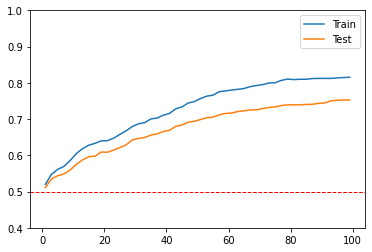

AT 15 0.6279 0.5962000000000001 IN 0.5588087558746337 SECONDS


In [37]:
RANDOM_SELECTION()

# SVM-RFE

In [51]:
@time_func
def SVM_RFE_NO_STEP():
    kf = KFold(n_splits=32, shuffle=True)

    index = [(test_index, train_index, 1) for test_index, train_index in kf.split(data.X_train)]
    with Pool(8) as pool:
        scores = pool.map(data.svm_rfe, index)

    # scores = list(map(data.svm_rfe, index))

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = scores[0][2]
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores)
    print("AT 15", train_scores[15], test_scores[15], "WITH", len(points), "ITERATIONS IN ", time)

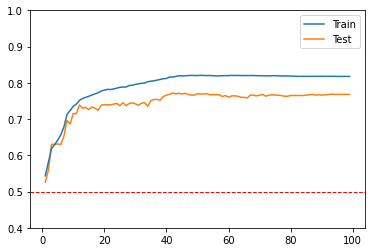

AT 15 0.7629360778130304 0.7261844758064516 WITH 99 ITERATIONS IN  0.7407147437334061
__main__.SVM_RFE_NO_STEP - 00:00:08.318363000


In [39]:
SVM_RFE_NO_STEP()

# SVM-RFE with Step


In [55]:
@time_func
def SVM_RFE_W_STEP(step):
    kf = KFold(n_splits=32, shuffle=True)

    index = [(test_index, train_index, step) for test_index, train_index in kf.split(data.X_train)]
    with Pool(8) as pool:
        scores = pool.map(data.svm_rfe, index)

    # scores = list(map(data.svm_rfe, index))
    scores = list(scores)

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = list(scores[0][2])
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, points)
    print("AT 15", train_scores[15], test_scores[15], "WITH", len(points), "ITERATIONS IN ", time)

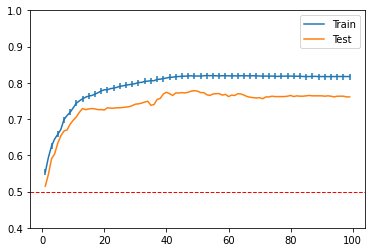

AT 15 0.7636771888779434 0.7279800907258064 WITH 50 ITERATIONS IN  0.3570595905184746
__main__.SVM_RFE_W_STEP - 00:00:06.688584900


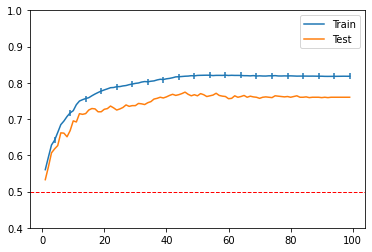

AT 15 0.7589693928626257 0.7250189012096774 WITH 20 ITERATIONS IN  0.1598433330655098
__main__.SVM_RFE_W_STEP - 00:00:06.013349800
__main__.SVM_RFE_W_STEP - 00:00:05.745695300


KeyboardInterrupt: 

In [57]:
SVM_RFE_W_STEP(2)
SVM_RFE_W_STEP(5)
SVM_RFE_W_STEP(10)
SVM_RFE_W_STEP(50)
SVM_RFE_W_STEP(100)
SVM_RFE_W_STEP(200)
SVM_RFE_W_STEP(300)

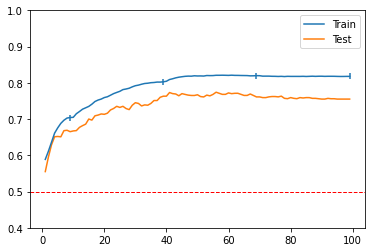

AT 15 0.7349952744799529 0.7001008064516128 WITH 4 ITERATIONS IN  0.03574337065219879
__main__.SVM_RFE_W_STEP - 00:00:05.426156500


In [54]:
SVM_RFE_W_STEP(30)

# SVM-RFE with DynamicStep

In [4]:
@time_func
def SVM_RFE_W_DSTEP(percentage):
    kf = KFold(n_splits=32, shuffle=True)

    index = [(test_index, train_index, percentage) for test_index, train_index in kf.split(data.X_train)]
    with Pool(8) as pool:
        scores = pool.map(data.svm_rfe_dynamic_step, index)

    # scores = list(map(data.svm_rfe, index))
    scores = list(scores)

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = list(scores[0][2])
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, points)
    print("AT 15", train_scores[15], test_scores[15], "WITH", len(points), "ITERATIONS IN ", time)

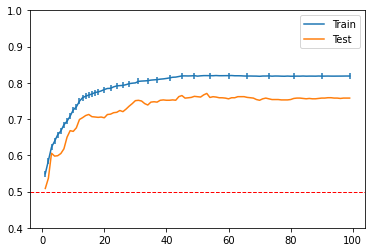

AT 15 0.7663866669438546 0.7127331149193548 WITH 36 ITERATIONS IN  0.16912160068750381
__main__.SVM_RFE_W_DSTEP - 00:00:06.181951900


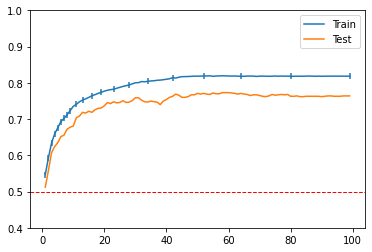

AT 15 0.7598051875708962 0.721648185483871 WITH 21 ITERATIONS IN  0.08946815133094788
__main__.SVM_RFE_W_DSTEP - 00:00:05.721656300


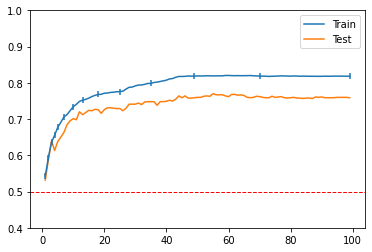

AT 15 0.7577420702948425 0.7240738407258065 WITH 14 ITERATIONS IN  0.05784258246421814
__main__.SVM_RFE_W_DSTEP - 00:00:05.250088500


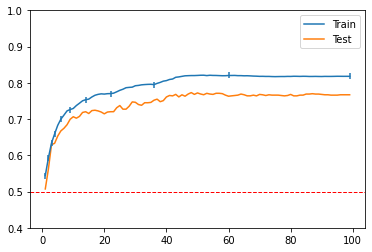

AT 15 0.7550963254484047 0.7153792842741935 WITH 11 ITERATIONS IN  0.04537367820739746
__main__.SVM_RFE_W_DSTEP - 00:00:05.177277700


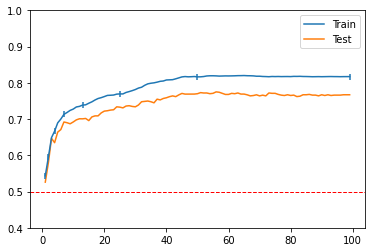

AT 15 0.7437084351465684 0.6957850302419355 WITH 8 ITERATIONS IN  0.03831034153699875
__main__.SVM_RFE_W_DSTEP - 00:00:05.381157900


In [6]:
SVM_RFE_W_DSTEP(0.1)
SVM_RFE_W_DSTEP(0.2)
SVM_RFE_W_DSTEP(0.3)
SVM_RFE_W_DSTEP(0.4)
SVM_RFE_W_DSTEP(0.5)